In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [29]:
import os
os.chdir('/content/drive/My Drive/TAX/COVID_19_CT_Data')
print(os.getcwd())

/content/drive/My Drive/TAX/COVID_19_CT_Data


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import pickle


datapath='/content/drive/My Drive/TAX/COVID_19_CT_Data/Train'
categories=['COVID','non-COVID']

training_data=[]

def create_training_data():
    with tf.device('/device:GPU:0'):
        for cat in categories:
            path=os.path.join(datapath,cat)
            class_num=categories.index(cat)
            for img in os.listdir(path):
                try:
                    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                    new=cv2.resize(img_array,(100,100))
                    training_data.append([new,class_num])
                except Exception as e:
                    pass

create_training_data()

random.shuffle(training_data)

X=[]
y=[]


for features,label in training_data:
    X.append(features)
    y.append(label)


X=np.array(X).reshape(-1,100,100,1)

#Storing the Prepare data with the help of Packle

pickle_out=open("Xtrain.pickle","wb") 
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("ytrain.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [5]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D, Dropout
import pickle
from keras.utils.np_utils import to_categorical

X=pickle.load(open("Xtrain.pickle","rb"))
y=pickle.load(open("ytrain.pickle","rb"))

X=X/255.0

model=Sequential()
y=to_categorical(y)


model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(2))
model.add(Activation("softmax"))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=['accuracy'])

history=model.fit(X,y,batch_size=32,epochs=30,validation_split=0.1)
model.save("CovidDetector")

Epoch 1/30
40/40 [==============================] - 34s 30ms/step - loss: 1.0261 - accuracy: 0.5497 - val_loss: 0.5984 - val_accuracy: 0.7357
Epoch 2/30
40/40 [==============================] - 1s 16ms/step - loss: 0.4855 - accuracy: 0.7701 - val_loss: 0.4419 - val_accuracy: 0.8286
Epoch 3/30
40/40 [==============================] - 1s 16ms/step - loss: 0.3925 - accuracy: 0.8517 - val_loss: 0.4140 - val_accuracy: 0.8000
Epoch 4/30
40/40 [==============================] - 1s 16ms/step - loss: 0.3628 - accuracy: 0.8373 - val_loss: 0.4249 - val_accuracy: 0.8500
Epoch 5/30
40/40 [==============================] - 1s 16ms/step - loss: 0.3404 - accuracy: 0.8410 - val_loss: 0.3948 - val_accuracy: 0.8286
Epoch 6/30
40/40 [==============================] - 1s 16ms/step - loss: 0.2971 - accuracy: 0.8765 - val_loss: 0.4110 - val_accuracy: 0.8500
Epoch 7/30
40/40 [==============================] - 1s 16ms/step - loss: 0.3154 - accuracy: 0.8577 - val_loss: 0.3486 - val_accuracy: 0.8643
Epoch 8/30
4

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)       

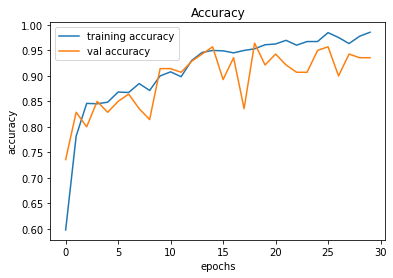

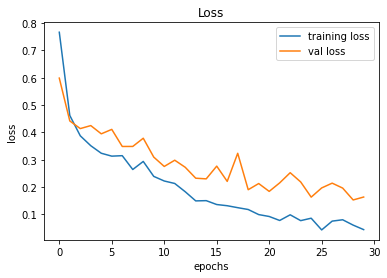

In [7]:
#plotting graphs for accuracy 
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import pickle


datapath='/content/drive/My Drive/TAX/COVID_19_CT_Data/Test'
categories=['COVID','non-COVID']

test_data=[]

def create_test_data():
    for cat in categories:
        path=os.path.join(datapath,cat)
        class_num=categories.index(cat)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new=cv2.resize(img_array,(100,100))
                test_data.append([new,class_num])
            except Exception as e:
                pass

create_test_data()

random.shuffle(test_data)

Xtest=[]
ytest=[]


for features,label in test_data:
    Xtest.append(features)
    ytest.append(label)

Xtest=np.array(Xtest).reshape(-1,100,100,1)
Xtest=Xtest/255.0
ytest=to_categorical(ytest)
model.evaluate(Xtest,ytest)


19/19 [==============================] - 0s 12ms/step - loss: 1.0309 - accuracy: 0.6536


[1.03085458278656, 0.6535836458206177]

In [9]:
from sklearn.metrics import confusion_matrix
ypred=model.predict_classes(Xtest)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
#Coverting the ytest data
y_test=[]
for i in ytest:
  count=0;
  for j in i:
    if(j==1.0):
      y_test.append(count)
    count=count+1
    #count++
#Coverting the ytest data
y_pred=[]
for i in ypred:
  y_pred.append(i)
print(y_test)
print(y_pred)

[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 

In [21]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 82 220]
 [103 181]]


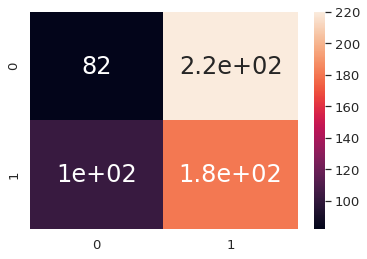

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sn.set(font_scale=1.2) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 24}) # font size
plt.show()
#categories=['COVID','non-COVID']
#          =[ 0     , 1         ]

In [23]:
import sklearn
sklearn.metrics.precision_score(y_test, y_pred)

0.4513715710723192

In [24]:
sklearn.metrics.recall_score(y_test, y_pred)

0.6373239436619719

In [25]:
sklearn.metrics.f1_score(y_test, y_pred)

0.5284671532846715

In [26]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.44880546075085326

In [27]:
import cv2
import numpy as np

def prepare(path):
  img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(100,100))
  return img.reshape(-1,100,100,1)

categories=['COVID','non-COVID']
model=tf.keras.models.load_model("CovidDetector")
prediction=model.predict([prepare("/content/drive/My Drive/TAX/COVID_19_CT_Data/Test/COVID/Covid (4).png")])
print(categories[np.argmax(prediction)])
prediction

COVID


array([[1., 0.]], dtype=float32)